In [1]:
from pprint import pformat

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv("aggregated_results/main_results_2023-03-12.csv")
df

,task_name,train_log2pr,val_log2pr,test_log2pr,train_auroc,val_auroc,test_auroc,network,label,method,runid
0,MONDO:0021034,5.452130,2.213430,4.299555,0.907676,0.704289,0.771057,humannet,disgenet,svd-logreg,4.0
1,MONDO:0002243,3.999161,1.508517,1.391891,0.916140,0.666234,0.685053,humannet,disgenet,svd-logreg,4.0
2,MONDO:0002245,2.753485,1.547721,1.049140,0.828769,0.646123,0.604265,humannet,disgenet,svd-logreg,4.0
3,MONDO:0001703,5.943613,4.183546,3.712374,0.966340,0.785444,0.927036,humannet,disgenet,svd-logreg,4.0
4,MONDO:0013099,6.842475,3.703523,2.558013,0.994086,0.841139,0.797267,humannet,disgenet,svd-logreg,4.0
...,...,...,...,...,...,...,...,...,...,...,...
97555,MONDO:0020133,7.967881,2.171143,3.855464,1.000000,0.756337,0.919821,string,diseases,walklets-logreg,4.0
97556,MONDO:0015514,4.878314,2.888149,3.178688,0.963064,0.719374,0.786264,string,diseases,walklets-logreg,4.0
97557,MONDO:0019042,2.704583,0.801325,1.233941,0.897980,0.641399,0.680139,string,diseases,walklets-logreg,4.0
97558,MONDO:0024322,5.498722,3.921747,3.676707,0.981815,0.955727,0.931447,string,diseases,walklets-logreg,4.0


In [3]:
method_order = (
    df
    .groupby("method")
    .mean(numeric_only=True)
    .sort_values("test_log2pr", ascending=False)
    .index.tolist()
)
print(f"Overall method rank:\n{pformat(method_order)}")

Overall method rank:
['n2v-logreg',
 'lapeig-logreg',
 'walklets-logreg',
 'line2-logreg',
 'line1-logreg',
 'randne-logreg',
 'svd-logreg',
 'hope-logreg',
 'louvainne-logreg']


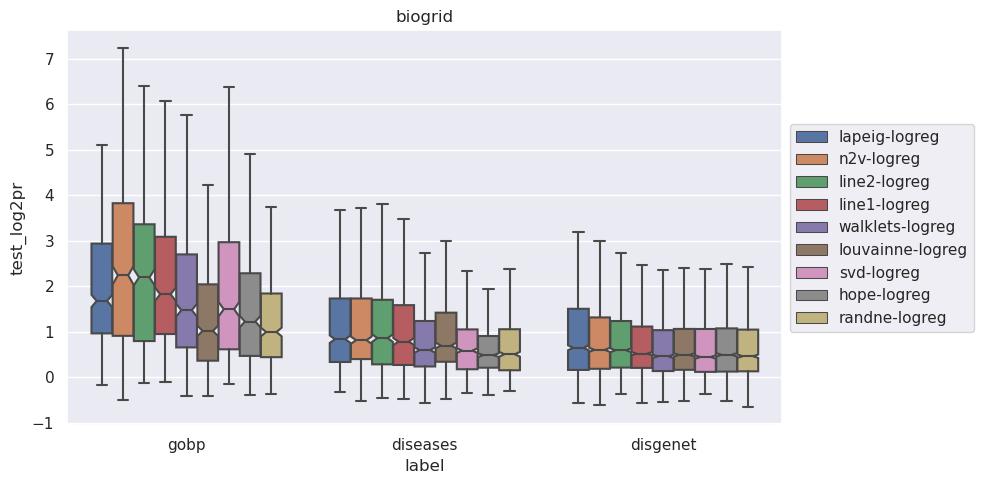

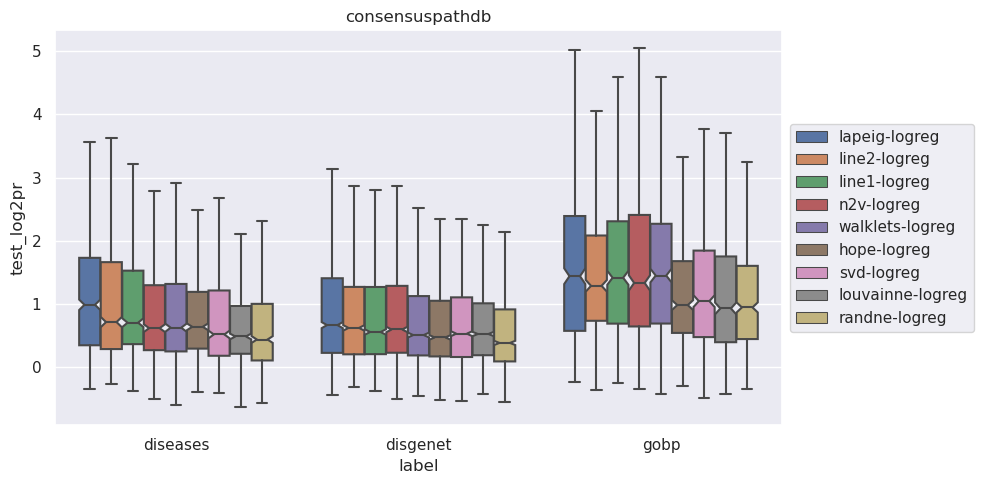

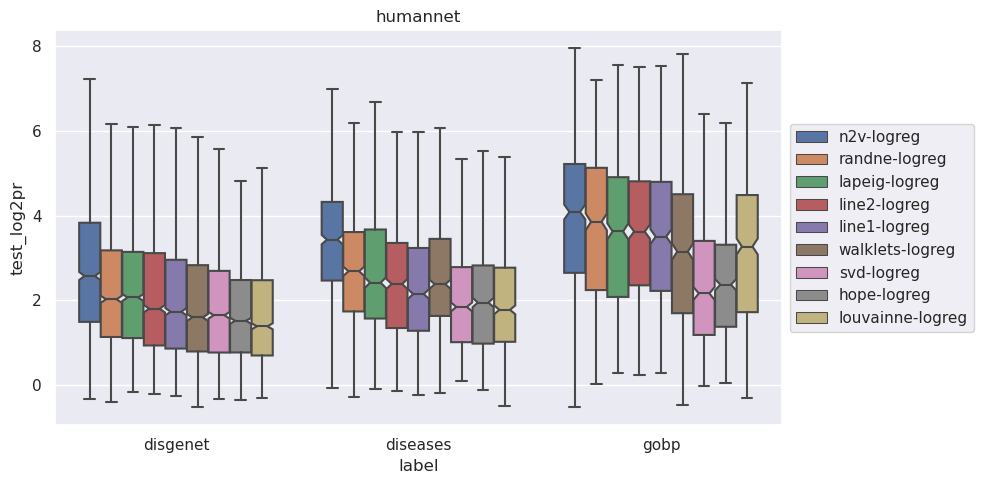

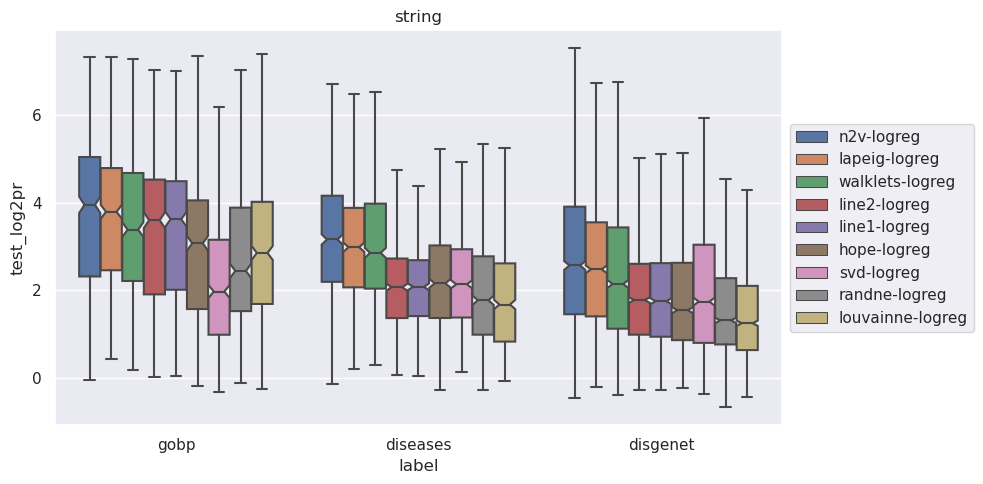

In [4]:
# ---------------
metric = "test_log2pr"
# ---------------

for network, group in df.groupby("network"):
    plt.figure(figsize=(10, 5))
    sns.boxplot(
        data=group,
        y=metric,
        hue="method",
        x="label",
        hue_order=(
            group
            .groupby("method")
            .median(numeric_only=True)
            .sort_values(metric, ascending=False)
            .index.tolist()
        ),
        notch=True,
        showfliers=False,
    )
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(network)
    plt.tight_layout()
    plt.show()
#     break